In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
stock_data = yf.download("AAPL MSFT AMZN META TSLA JPM JNJ MA ADBE COST", start="2018-10-01", end="2023-10-01")

[*********************100%%**********************]  10 of 10 completed


In [4]:
print(stock_data)
stock_data.to_csv('stock_data.csv')

             Adj Close                                                  \
                  AAPL        ADBE        AMZN        COST         JNJ   
Date                                                                     
2018-10-01   54.413643  275.489990  100.218002  219.163788  122.206734   
2018-10-02   54.897293  272.000000   98.565498  220.751587  122.897835   
2018-10-03   55.565315  270.510010   97.638000  217.809494  121.629333   
2018-10-04   54.588440  263.709991   95.471001  216.389786  121.909294   
2018-10-05   53.702515  263.220001   94.482498  204.378525  121.690575   
...                ...         ...         ...         ...         ...   
2023-09-25  176.080002  511.600006  131.270004  557.596680  160.259995   
2023-09-26  171.960007  506.299988  125.980003  551.947083  159.020004   
2023-09-27  170.429993  502.600006  125.980003  562.497681  157.110001   
2023-09-28  170.690002  504.670013  125.980003  567.588318  156.880005   
2023-09-29  171.210007  509.899994  12

In [5]:
#Check for missing values
print(stock_data.isnull().sum())

Adj Close  AAPL    0
           ADBE    0
           AMZN    0
           COST    0
           JNJ     0
           JPM     0
           MA      0
           META    0
           MSFT    0
           TSLA    0
Close      AAPL    0
           ADBE    0
           AMZN    0
           COST    0
           JNJ     0
           JPM     0
           MA      0
           META    0
           MSFT    0
           TSLA    0
High       AAPL    0
           ADBE    0
           AMZN    0
           COST    0
           JNJ     0
           JPM     0
           MA      0
           META    0
           MSFT    0
           TSLA    0
Low        AAPL    0
           ADBE    0
           AMZN    0
           COST    0
           JNJ     0
           JPM     0
           MA      0
           META    0
           MSFT    0
           TSLA    0
Open       AAPL    0
           ADBE    0
           AMZN    0
           COST    0
           JNJ     0
           JPM     0
           MA      0
           ME

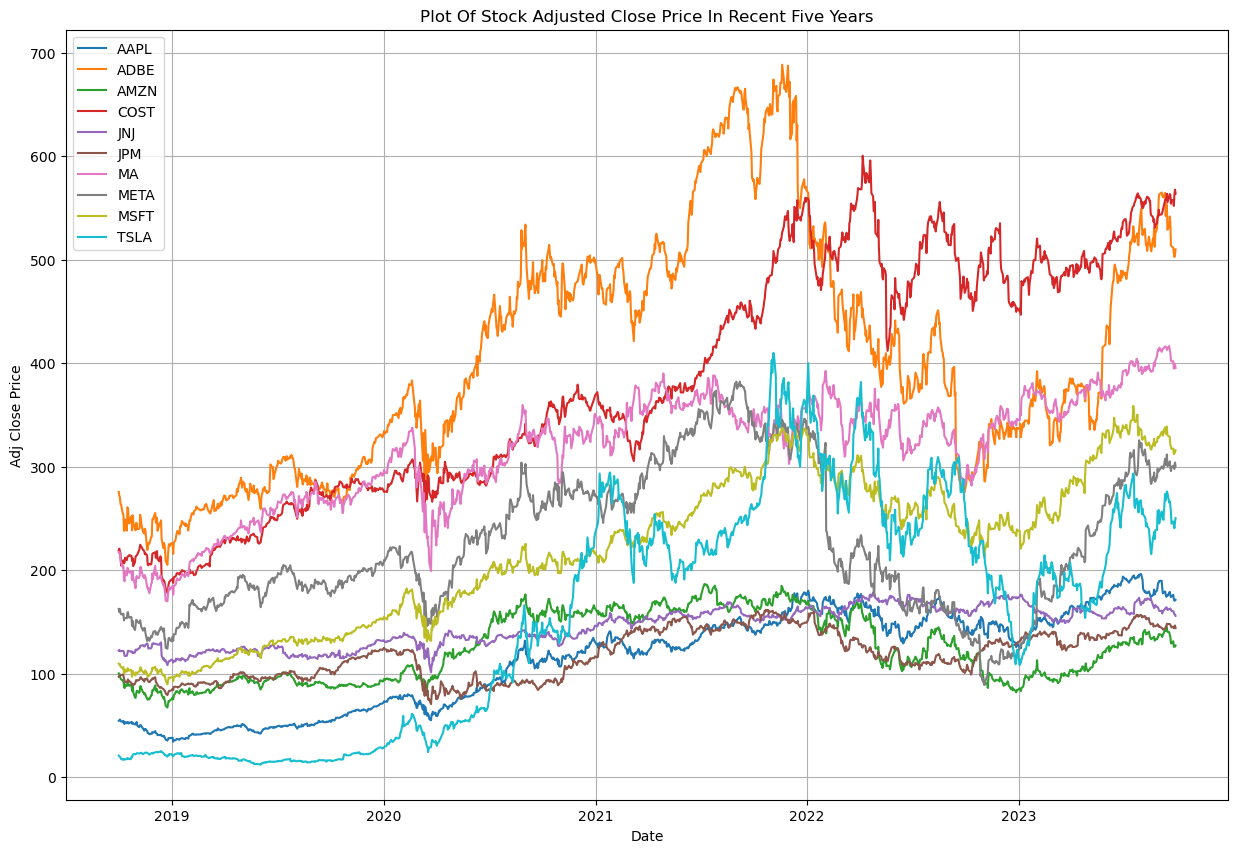

In [6]:
sorted_data = stock_data.sort_values(by="Date", ascending=False)
sorted_df = sorted_data['Adj Close']
plt.figure(figsize= (15, 10))
for column in sorted_df.columns:
    plt.plot(sorted_df.index, sorted_df[column], label=column)
plt.title("Plot Of Stock Adjusted Close Price In Recent Five Years")
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.legend()
plt.grid()
plt.show()

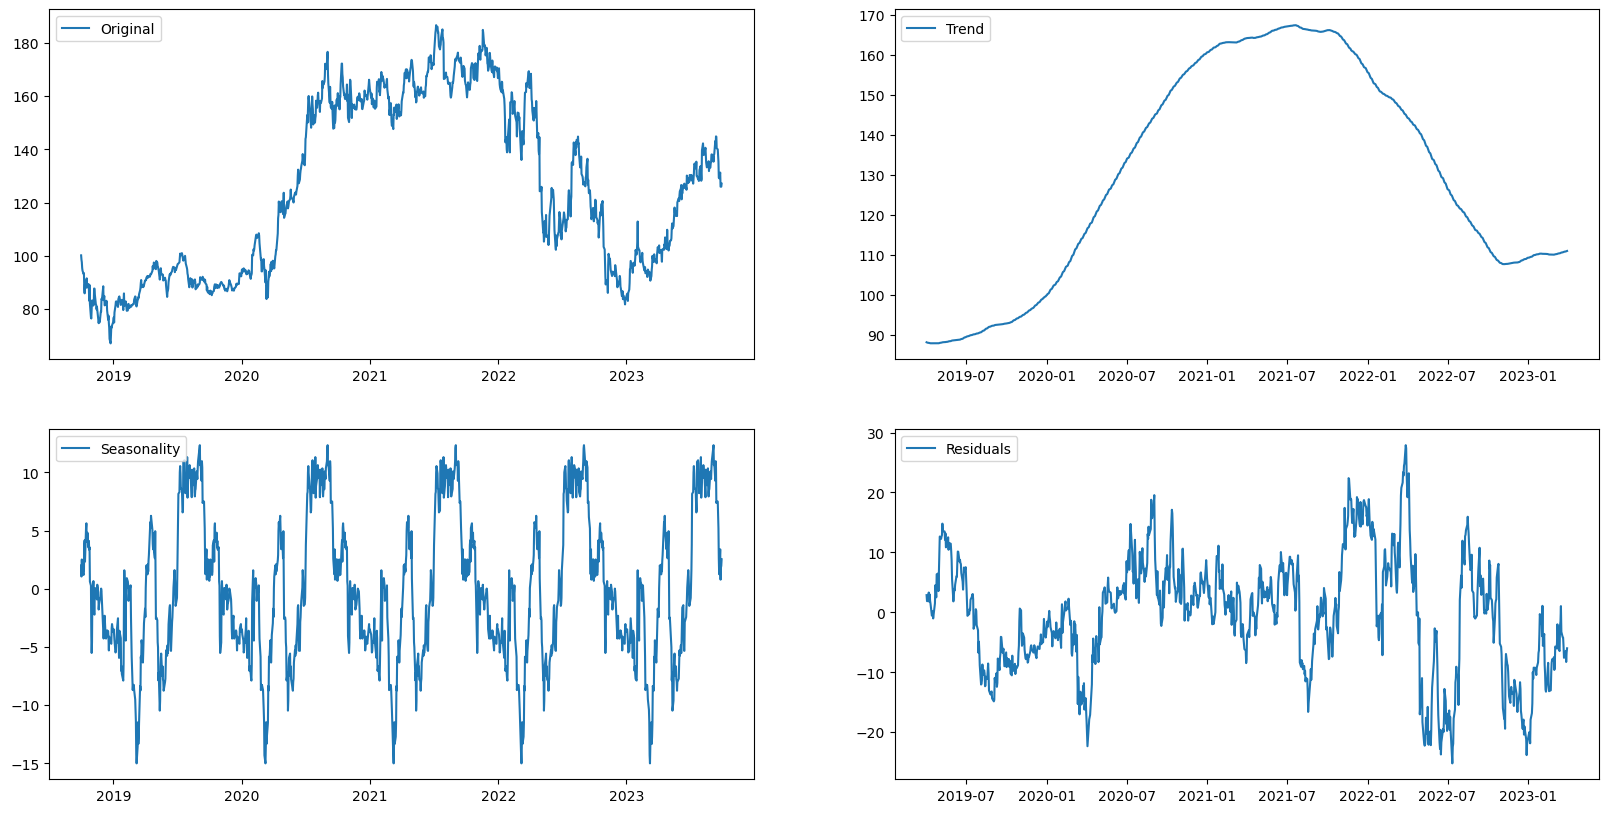

In [8]:
### Data decomposition of AAPL
stock_df = stock_data['Adj Close']
aapl = stock_df['AAPL']
amzn = stock_df['AMZN']

from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

decomposition = seasonal_decompose(amzn, model='additive', period=252)
trend_estimate = decomposition.trend
seasonal_estimate = decomposition.seasonal
residual_estimate = decomposition.resid

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes[0, 0].plot(amzn, label='Original') 
axes[0, 0].legend(loc='upper left')
axes[0, 1].plot(trend_estimate, label='Trend')
axes[0, 1].legend(loc='upper left')
axes[1, 0].plot(seasonal_estimate, label='Seasonality')
axes[1, 0].legend(loc='upper left')
axes[1, 1].plot(residual_estimate, label='Residuals')
axes[1, 1].legend(loc='upper left')
plt.show()

In [9]:
### conduct Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

kpss_results = kpss(amzn, regression="ct")
print("Test statistics: {}".format(kpss_results[0]))
print("P_value: {}".format(kpss_results[1]))
print("Critical values: {}".format(kpss_results[-1]))

Test statistics: 1.1887107857888664
P_value: 0.01
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


C:\Users\shumi\AppData\Local\Temp\ipykernel_14744\3340594595.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_results = kpss(amzn, regression="ct")
